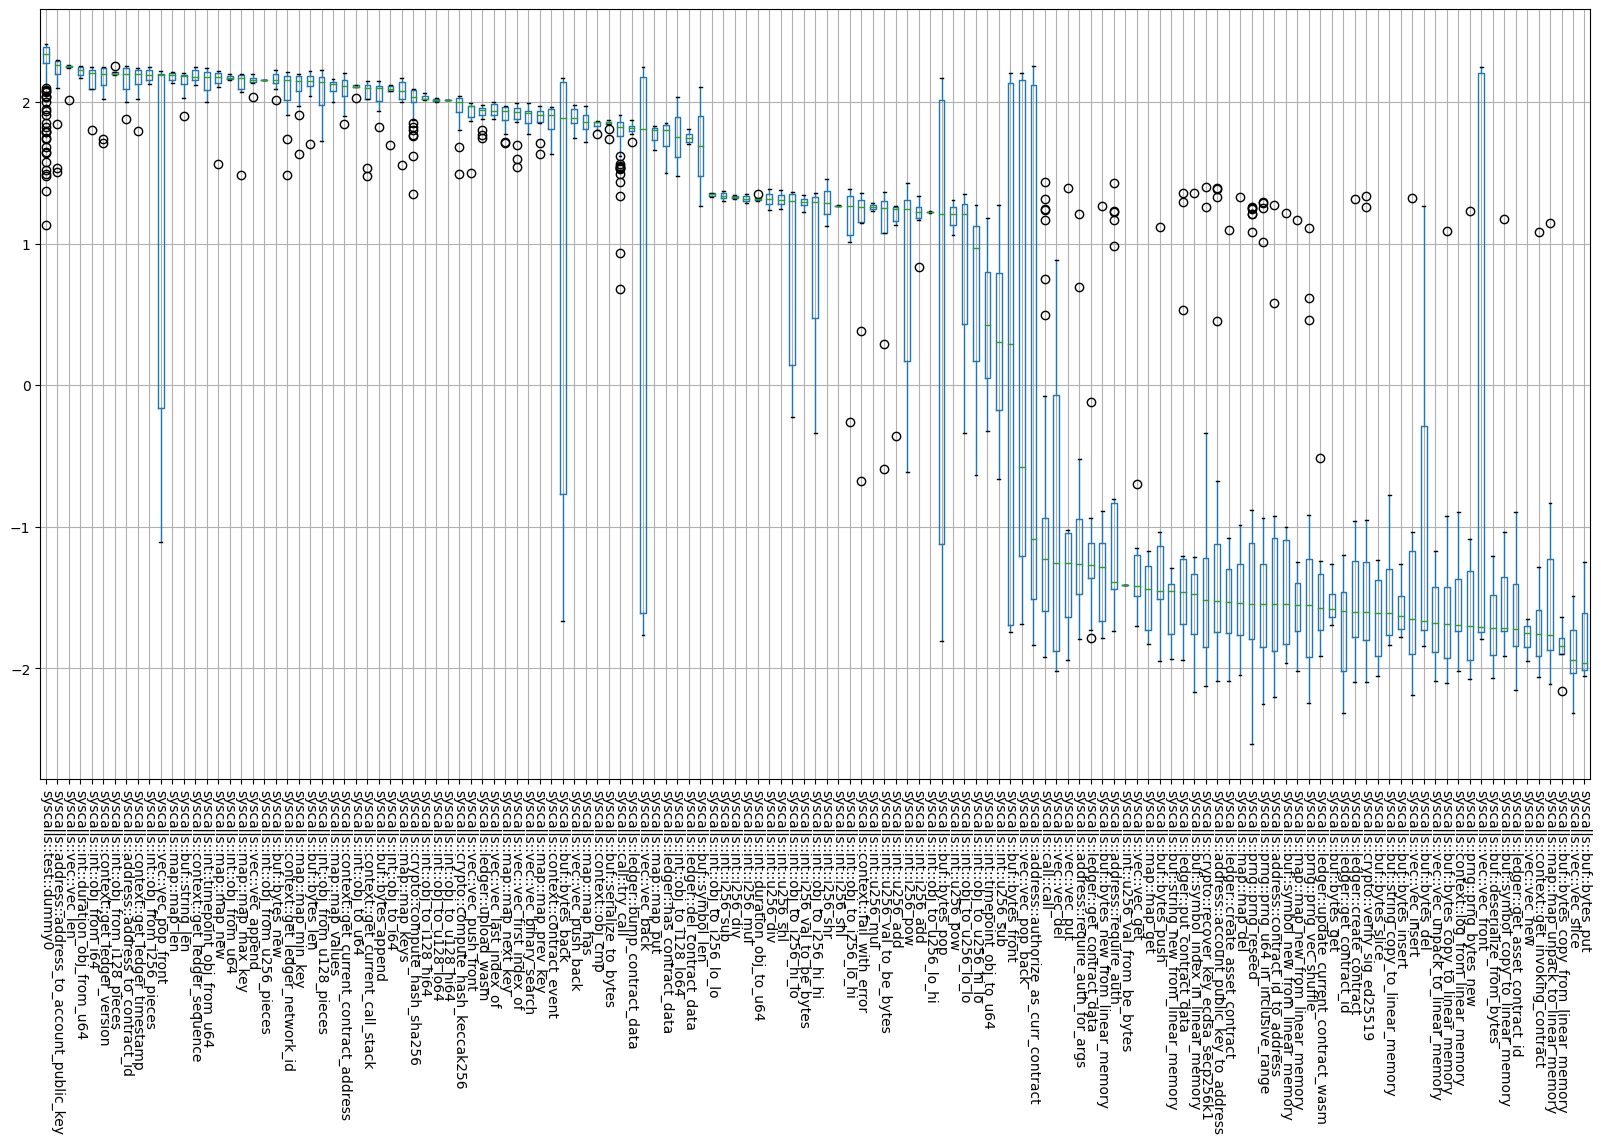

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('budget.csv', index_col=None, sep='|')
df = pd.DataFrame(data, columns=['Syscalls', 'CPU', 'MEM', 'Duration']) # 'SyscallsInput', 'ArbitraryInput',
df.set_index("Syscalls", drop = False)

df["cpu_duration_ratio"] = df["CPU"] / df["Duration"]
df["log"] = np.log10(df.loc[:, 'cpu_duration_ratio'])

grouped = df.groupby("Syscalls")
df2 = pd.DataFrame({col: vals["log"] for col, vals in grouped})

meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]
df2.boxplot(rot = 270, figsize=(20,10))

plt.savefig('plot.png', bbox_inches='tight')
plt.show()
